In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from google.colab import files
import matplotlib.pyplot as plt
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/My Drive/mnist/mnist_train.csv')

Mounted at /content/drive


In [ ]:
def prepare_binary(class1:int,class2:int):

        #USAGE    
        # Since we have to deal with a binary classifier to diffrentiate between digits 7 and 1, 
        # we choose only those examples.
        # If asked to train a classifier on any other pair a, b (say),
        # please pass the right arguments to the following function as follows:
        # trainlabel, traindata = prepare_binary(a,b)


        # We now assign +1 to one class and -1 to the other;
        # Therefore +1 and -1 will be the new labels
        trainlabel = dataset.loc[(dataset['label']== class1)  | (dataset['label']== class2) ]['label']
        trainlabel.loc[trainlabel == class1] = +1
        trainlabel.loc[trainlabel == class2] = -1
        trainlabel = trainlabel.to_numpy()
    
        #In order to match dimensions of "traindata" and "trainlabel", we convert trainlabel to two dimension array
        trainlabel= np.reshape(trainlabel, (trainlabel.shape[0],1))   

        # We now extract the features for the two classes
        traindata = dataset.loc[(dataset['label']== class1)  | (dataset['label']== class2) ]
        traindata = traindata.drop(labels = ["label"],axis = 1).to_numpy()

        trainDf=pd.DataFrame(traindata)
        targetDf=pd.DataFrame(trainlabel,columns=['target'])
        dataTargetDf = pd.concat([trainDf, targetDf[['target']]], axis = 1)

        ##Yet to randomize the order of the data returned
        return trainlabel,traindata, dataTargetDf

In [ ]:
trainlabel, traindata, dataTargetDf = prepare_binary(1,7)
#subsetDf = trainDf.sample(frac = 0.2)
def subset(dataTargetDf, subsetfrac:float):
  # Usage: If 20% of the data is to be randomly selected
  # subsetDf = subset(dataTargetDf, 0.2)
  return dataTargetDf.sample(frac = subsetfrac)

subsetDf = subset(dataTargetDf, 1.0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [ ]:
subsetDf.shape
#trainDf.shape
#1817/9085

(9085, 785)

In [ ]:
#number of clusters
k = 3

#randomly choose three feature vectors as mean values
meanloc = np.random.randint(traindata.shape[0], size=k)
print ('Location of mean is: {}'.format(meanloc))
mean = [[traindata[meanloc[0]]], [traindata[meanloc[2]]], [traindata[meanloc[2]]]]
print ('Mean value is: {}'.format(np.asarray(mean).shape))
print ('Value of the first mean is: {}'.format(traindata[mean[0]].shape))

Location of mean is: [4172 9057 3262]
Mean value is: (3, 1, 784)
Value of the first mean is: (784, 784)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if __name__ == '__main__':


In [ ]:
import numpy as np
from numpy import linalg as LA
#a = np.asarray([1,2,1,5])
#b = np.asarray([[1,2,3,1],[4,5,6,9],[7,8,9,10]])
#print (np.asarray(b).shape)
#print ('Shape 1: {}'.format((b-a).shape))
#print (LA.norm((np.asarray([1,2,3,1])-np.asarray([1,2,1,5])),axis=0))
#print ('Shape of norm2: {} '.format(LA.norm((b-a),axis=1)))
mean = traindata[meanloc[0]], traindata[meanloc[1]], traindata[meanloc[2]]
mean = np.asarray(mean)
#print ('Value of mean at location 0 is: {}'.format(mean[0]))
#print (np.asarray(mean).shape)
#print (traindata.shape)
#print (mean[2].shape)
cluster0=[]
cluster1=[]
cluster2=[]
#cluster=cluster


for i in range(traindata.shape[0]):
  clustervalue = np.where(LA.norm((traindata[i]-mean),axis=1) == np.amin(LA.norm((traindata[i]-mean),axis=1)))
  print ('Sample {}'.format(i) + ' belongs to cluster {}'.format(clustervalue[0][0]))
  #print ('Cluster name is: ', str('cluster')+str(clustervalue[0][0]))
  if (clustervalue[0][0]==0):
    print ('Appending Cluster 0')
    cluster0.append(traindata[i])
  elif (clustervalue[0][0]==1):
    print ('Appending Cluster 1')
    cluster1.append(traindata[i])
  else: 
    print ('Appending Cluster 2')
    cluster2.append(traindata[i])
  
  #print (str(clustervalue[0][0]))
  #(cluster+clustervalue[0][0]).append(traindata[i])
  #print ('Cluster name is: ', str('cluster')+str(clustervalue[0][0]))
  #cluster.append(traindata[i])
  #Update mean for the updated cluster
  #print ('Value of the mean vector at cluster {} before updation'.format(clustervalue[0][0])+ ' is: {}'.format((mean[clustervalue[0][0]])))
  print ('Updating the mean for cluster {}'.format(clustervalue[0][0]))
  #mean[clustervalue[0][0]] = (mean[clustervalue[0][0]] + traindata[i])/2
  mean[clustervalue[0][0]] = np.mean( np.array([ mean[clustervalue[0][0]] , traindata[i]]), axis=0)
  mean[clustervalue[0][0]].shape
  exit()
  #print ('Shape of the train data: {}'.format(traindata[i].shape))
  #print ('Shape of the mean vector: {}'.format((mean[clustervalue[0][0]]).shape))
  #print ('Updated Mean: {}'.format(mean[clustervalue[0][0]]))
  #break

print ('Shape of cluster0 is {}'.format(np.asarray(cluster0).shape))
print ('Shape of cluster1 is {}'.format(np.asarray(cluster1).shape))
print ('Shape of cluster2 is {}'.format(np.asarray(cluster2).shape))
#print ('The value of the norm is: {}'.format(LA.norm((traindata[0]-mean),axis=1)))
#print ('Location of the minimum norm is: {}'.format(np.where(LA.norm((traindata[0]-mean),axis=1) == np.amin(LA.norm((traindata[0]-mean),axis=1)))))
#print ('Value of the minimum norm is: {}'.format(np.amin(LA.norm((traindata[0]-mean),axis=1))))

#def norm_2(mean, vector):


#for i in range (traindata.shape[0]):



  

Streaming output truncated to the last 5000 lines.
Appending Cluster 2
Updating the mean for cluster 2
Sample 7420 belongs to cluster 1
Appending Cluster 1
Updating the mean for cluster 1
Sample 7421 belongs to cluster 1
Appending Cluster 1
Updating the mean for cluster 1
Sample 7422 belongs to cluster 0
Appending Cluster 0
Updating the mean for cluster 0
Sample 7423 belongs to cluster 1
Appending Cluster 1
Updating the mean for cluster 1
Sample 7424 belongs to cluster 1
Appending Cluster 1
Updating the mean for cluster 1
Sample 7425 belongs to cluster 1
Appending Cluster 1
Updating the mean for cluster 1
Sample 7426 belongs to cluster 1
Appending Cluster 1
Updating the mean for cluster 1
Sample 7427 belongs to cluster 0
Appending Cluster 0
Updating the mean for cluster 0
Sample 7428 belongs to cluster 1
Appending Cluster 1
Updating the mean for cluster 1
Sample 7429 belongs to cluster 0
Appending Cluster 0
Updating the mean for cluster 0
Sample 7430 belongs to cluster 2
Appending Clus

In [ ]:
traindata.shape
mean.shape

NameError: ignored

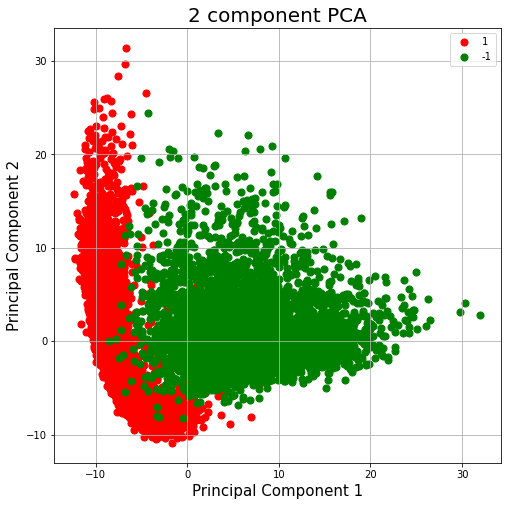

In [ ]:
#PCA on the data before and after clustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
traindata = StandardScaler().fit_transform(traindata)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(traindata)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
targetDf=pd.DataFrame(trainlabel,columns=['target'])
finalDf = pd.concat([principalDf, targetDf[['target']]], axis = 1)
finalDf.head

#Plotting

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, -1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [ ]:
finalDf.head()

,principal component 1,principal component 2,target
0,-9.886023,11.480470,1
1,-5.172197,-7.752620,1
2,3.935113,-1.819630,-1
3,-6.659385,-5.138492,1
4,-5.682504,-2.458684,1


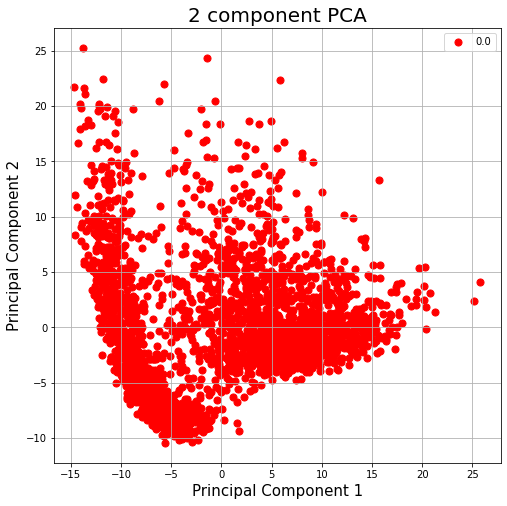

In [ ]:
scaler = StandardScaler()

labeldf0 =pd.DataFrame(np.zeros(np.asarray(cluster0).shape[0]),columns=['Cluster Label'])


clusterdata0 = StandardScaler().fit_transform(cluster0)
pca = PCA(n_components=2)
Cluster0_principalComponents = pca.fit_transform(clusterdata0)
ClusterDf0 = pd.DataFrame(data = Cluster0_principalComponents, columns = ['principal component 1', 'principal component 2'])
final_ClusterDf0 = pd.concat([ClusterDf0, labeldf0[['Cluster Label']]], axis = 1)

#Plotting

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0.0]
colors = ['r']
for target, color in zip(targets,colors):
    indicesToKeep = final_ClusterDf0['Cluster Label'] == target
    ax.scatter(final_ClusterDf0.loc[indicesToKeep, 'principal component 1']
               , final_ClusterDf0.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

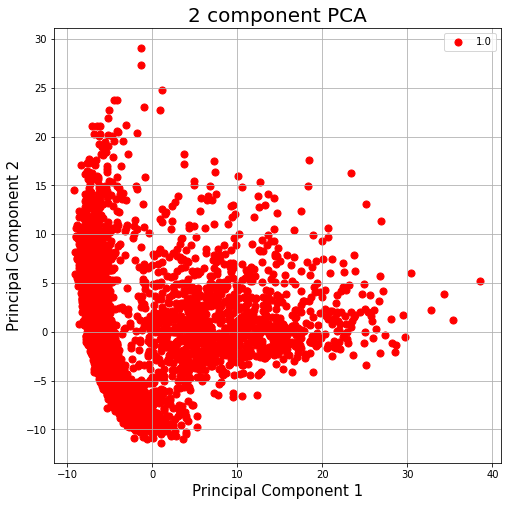

In [ ]:
scaler = StandardScaler()

labeldf1 =pd.DataFrame(np.ones(np.asarray(cluster1).shape[0]),columns=['Cluster Label'])


clusterdata1 = StandardScaler().fit_transform(cluster1)
pca = PCA(n_components=2)
Cluster1_principalComponents = pca.fit_transform(clusterdata1)
ClusterDf1 = pd.DataFrame(data = Cluster1_principalComponents, columns = ['principal component 1', 'principal component 2'])
final_ClusterDf1 = pd.concat([ClusterDf1, labeldf1[['Cluster Label']]], axis = 1)

#Plotting

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1.0]
colors = ['r']
for target, color in zip(targets,colors):
    indicesToKeep = final_ClusterDf1['Cluster Label'] == target
    ax.scatter(final_ClusterDf1.loc[indicesToKeep, 'principal component 1']
               , final_ClusterDf1.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

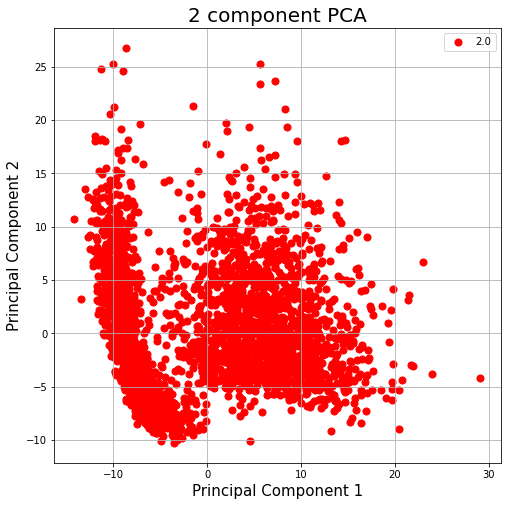

In [ ]:
scaler = StandardScaler()

labeldf2 =pd.DataFrame((np.ones(np.asarray(cluster2).shape[0]))*2,columns=['Cluster Label'])


clusterdata2 = StandardScaler().fit_transform(cluster2)
pca = PCA(n_components=2)
Cluster2_principalComponents = pca.fit_transform(clusterdata2)
ClusterDf2 = pd.DataFrame(data = Cluster2_principalComponents, columns = ['principal component 1', 'principal component 2'])
final_ClusterDf2 = pd.concat([ClusterDf2, labeldf2[['Cluster Label']]], axis = 1)

#Plotting

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [2.0]
colors = ['r']
for target, color in zip(targets,colors):
    indicesToKeep = final_ClusterDf2['Cluster Label'] == target
    ax.scatter(final_ClusterDf2.loc[indicesToKeep, 'principal component 1']
               , final_ClusterDf2.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
a= [1,2,3]
b= [4,7,5]
np.mean( np.array([ a, b ]), axis=0)

array([2.5, 4.5, 4. ])